In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/aarsh/Downloads/rssi.csv',usecols=['DateTime','A2_RSSI'],parse_dates=['DateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30975729 entries, 0 to 30975728
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   DateTime  datetime64[ns]
 1   A2_RSSI   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 472.7 MB


In [3]:
df = df.reset_index().set_index('DateTime')
df.head()

,index,A2_RSSI
DateTime,,
2021-01-09 00:00:01,0,2.09
2021-01-09 00:00:02,1,1.99
2021-01-09 00:00:03,2,2.05
2021-01-09 00:00:04,3,2.06
2021-01-09 00:00:05,4,1.75


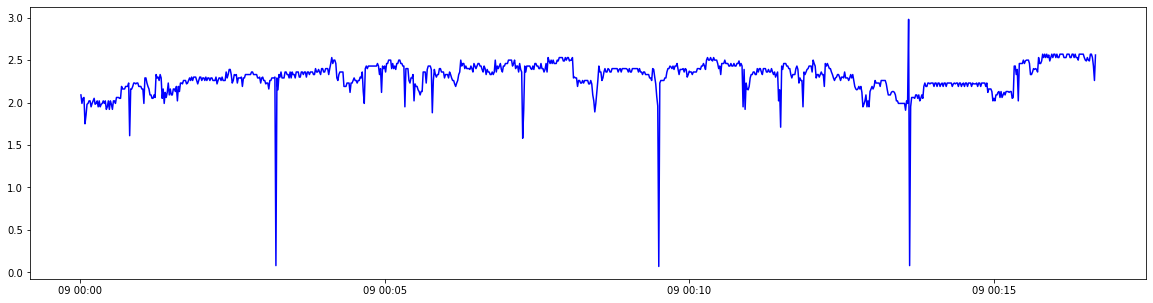

In [4]:
plt.figure(figsize=(20,5))
plt.plot(df['A2_RSSI'][:1000],color='blue')
plt.show()

# Exploring Stationarity Of The Time Series
- Rolling Mean and Std

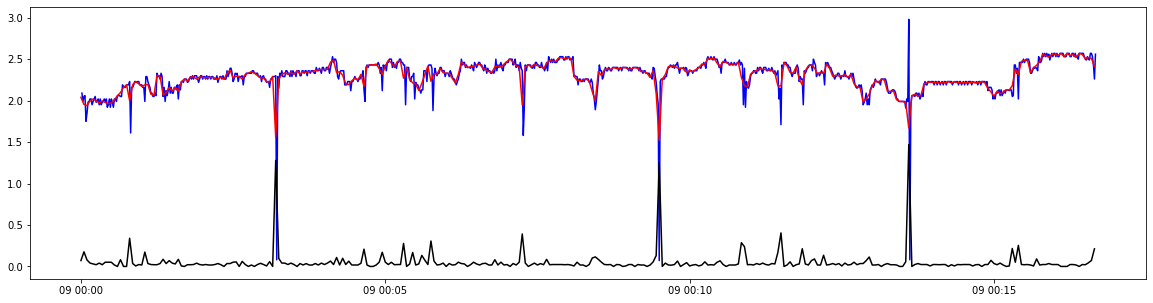

In [11]:
rollmean = df[:1000].resample(rule='3S').mean()
rollstd =df[:1000].resample(rule='3S').std()

plt.figure(figsize=(20,5))
plt.plot(df['A2_RSSI'][:1000],color='blue',label='Original')
plt.plot(rollmean['A2_RSSI'],color='red',label='Rolling Mean')
plt.plot(rollstd['A2_RSSI'],color='black',label='Rolling Std')
plt.show()

# Dicky Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller
X = df['A2_RSSI'][0:20000].values
result = adfuller(X)

print('ADF Statistic:%f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key , value))

if result[0] < result[4]["5%"]:
    print("Time Series is Stationary")
else:
    print("Time Series is Non - Stationary")

ADF Statistic:-9.879085
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


# Modelling (Isolation Forest)

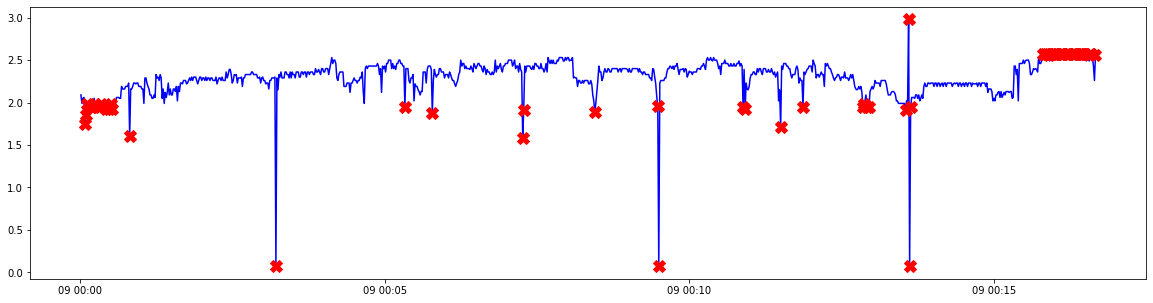

In [10]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.06
X1 = df['A2_RSSI'][:1000].values.reshape(-1,1)
model = IsolationForest(contamination=outliers_fraction)
model.fit(X1)
df['anomaly'][:1000] = pd.Series(model.predict(X1))

a = df.loc[df['anomaly'] == -1]
plt.figure(figsize=(20,5))
plt.plot(df['A2_RSSI'][:1000],color = 'blue',label='Data')
plt.plot(a['A2_RSSI'][:1000] , linestyle='none',marker='X',color='red',markersize=12,label ='Anomaly')
plt.show()